<a href="https://colab.research.google.com/github/7laslan/7laslan/blob/main/Fake_News_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: Fake News Detection

In [ ]:
#Import the libraries
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string

In [ ]:
#Load the data
from google.colab import files
files.upload()

TypeError: ignored

In [ ]:
df = pd.read_csv('news.csv')
df.head()

In [ ]:
df.shape

In [ ]:
df.drop_duplicates(inplace= True)
df.shape

In [ ]:
df.isnull().sum()

In [ ]:
#Combine important columns
df['combined'] =df['title'] + ' ' +df['text']
df.head()

In [ ]:
nltk.download('stopwords')

In [ ]:
def process_text(text):
  nopunc = [char for char in text if char not in string.punctuation]
  nopunc = ''.join(nopunc)

  clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

  return clean_words

In [ ]:
df['combined'].head().apply(process_text)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
message_bow = CountVectorizer(analyzer=process_text).fit_transform(df['combined'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(message_bow, df['label'], test_size = 0.20, random_state = 0)

In [ ]:
message_bow.shape

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

In [ ]:
print(classifier.predict(X_train))
print(y_train.values)

In [ ]:
from sklearn.metrics import classification_report
pred = classifier.predict(X_train)
print(classification_report(y_train, pred))

In [ ]:
from sklearn.metrics import classification_report
pred = classifier.predict(X_test)
print(classification_report(y_test, pred))

In [3]:
#Test with a new dataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string

In [1]:
from google.colab import files
files.upload()

Saving Fake.csv to Fake.csv


In [2]:
from google.colab import files
files.upload()

Saving True.csv to True.csv


In [4]:
fake = pd.read_csv('Fake.csv')
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
true = pd.read_csv('True.csv')
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake.shape

In [ ]:
true.shape

In [6]:
fake['label'] = 'fake'
true['label'] = 'true'

In [ ]:
fake.head()

In [ ]:
true.head()

In [7]:
#Combine the two datasets
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [8]:
#Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [ ]:
#Check the data
data.head()

In [ ]:
data.info()

In [9]:
#Removing the date column
data.drop(['date'],axis=1,inplace=True)
data.head()

,title,text,subject,label
0,UNHINGED DEM HIJACKS TUCKER…Refuses to Leave S...,Democratic California Rep. Brad Sherman appear...,politics,fake
1,4-Year-Old Boy Shot In The Head After ‘Respon...,Yet another responsible gun owner caused her...,News,fake
2,Watch Bill Maher Absolutely SHRED Trump For T...,"Bill Maher LOVES ripping Donald Trump apart, a...",News,fake
3,Former FBI chief Mueller appointed to probe Tr...,WASHINGTON (Reuters) - The U.S. Justice Depart...,politicsNews,true
4,BREAKING : Next In Line For Speaker Of The Hou...,Rep. Kevin McCarthy (R-CA) has dropped out of ...,politics,fake


In [10]:
#Removing the title column
data.drop(['title'],axis=1,inplace=True)
data.head()

,text,subject,label
0,Democratic California Rep. Brad Sherman appear...,politics,fake
1,Yet another responsible gun owner caused her...,News,fake
2,"Bill Maher LOVES ripping Donald Trump apart, a...",News,fake
3,WASHINGTON (Reuters) - The U.S. Justice Depart...,politicsNews,true
4,Rep. Kevin McCarthy (R-CA) has dropped out of ...,politics,fake


In [11]:
#Converting the text to lowercase
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,label
0,democratic california rep. brad sherman appear...,politics,fake
1,yet another responsible gun owner caused her...,News,fake
2,"bill maher loves ripping donald trump apart, a...",News,fake
3,washington (reuters) - the u.s. justice depart...,politicsNews,true
4,rep. kevin mccarthy (r-ca) has dropped out of ...,politics,fake


In [12]:
data.isnull().sum()

text       0
subject    0
label      0
dtype: int64

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
def process_text(text):
  nopunc = [char for char in text if char not in string.punctuation]
  nopunc = ''.join(nopunc)

  clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

  return clean_words

In [15]:
data['text'].head().apply(process_text)

0    [democratic, california, rep, brad, sherman, a...
1    [yet, another, responsible, gun, owner, caused...
2    [bill, maher, loves, ripping, donald, trump, a...
3    [washington, reuters, us, justice, department,...
4    [rep, kevin, mccarthy, rca, dropped, race, hou...
Name: text, dtype: object

In [16]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join(word for word in x.split() if word not in (stop)))

In [17]:
data.head()

,text,subject,label
0,democratic california rep. brad sherman appear...,politics,fake
1,yet another responsible gun owner caused child...,News,fake
2,"bill maher loves ripping donald trump apart, f...",News,fake
3,washington (reuters) - u.s. justice department...,politicsNews,true
4,rep. kevin mccarthy (r-ca) dropped race house ...,politics,fake


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


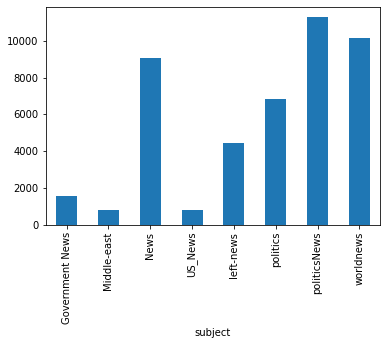

In [18]:
#Checking how many articles there are per different subject
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

label
fake    23481
true    21417
Name: text, dtype: int64


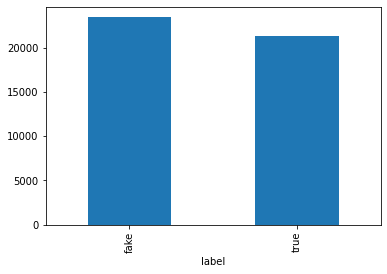

In [20]:
#Checking how many fake and true news articles are in the dataset
print(data.groupby(['label'])['text'].count())
data.groupby(['label'])['text'].count().plot(kind='bar')
plt.show()

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
message_bow = CountVectorizer(analyzer=process_text).fit_transform(data['text'])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(message_bow, data['label'], test_size = 0.20, random_state = 0)

In [23]:
message_bow.shape

(44898, 245227)

In [24]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [25]:
print(classifier.predict(X_train))
print(y_train.values)

['fake' 'true' 'true' ... 'fake' 'fake' 'fake']
['fake' 'true' 'true' ... 'fake' 'fake' 'fake']


In [26]:
from sklearn.metrics import classification_report
pred = classifier.predict(X_train)
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

        fake       1.00      0.97      0.98     18846
        true       0.97      0.99      0.98     17072

    accuracy                           0.98     35918
   macro avg       0.98      0.98      0.98     35918
weighted avg       0.98      0.98      0.98     35918



In [27]:
from sklearn.metrics import classification_report
pred = classifier.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        fake       0.99      0.96      0.97      4635
        true       0.96      0.99      0.97      4345

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980

